<a href="https://colab.research.google.com/github/latte05/ML_training/blob/master/OpenCV2_find_contours(%E8%BC%AA%E9%83%AD%E6%8A%BD%E5%87%BA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving flower.jpg to flower.jpg
User uploaded file "flower.jpg" with length 28353 bytes


124 113 176 56
61 64 31 26
98 53 97 116


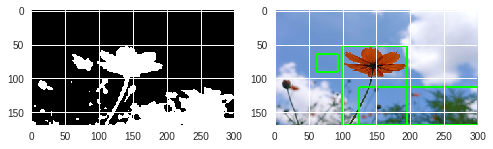

In [9]:
#find contours
#物体の輪郭を抽出
import cv2
import matplotlib.pyplot as plt


#import image file and resize
img = cv2.imread("flower.jpg")
img = cv2.resize(img, (300, 169))


# IMPORTANT: change the color to binary 
# -change color to gray
# -use GaussianBlur function　平滑化、ぼかして複雑な模様を消す
# -2値化は threshold() func

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7,7), 0)
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]


# GaussianBlur is good for whitenoise removal
# there is other cv2.blur() and cv2.medianBlur(), cv2.bilateralFilter() 
# 
# Gaussian Filter
# img = cv2.GaussianBlur(img, (ax, ay), sigma_x)
#   (ax, ay) 平滑化する画素の周囲
#   sigma_x = 横方向の標準偏差 0の場合はカーネルのサイズから自動的に計算
#   cv2.bilateralFilter 関数: エッジを残したまま画像をぼかすが、処理速度は遅くなる

#　閾値処理 - 画像の２値化
#  画素が指定の閾値より大きい場合は白、小さければ黒
#
# ret, img = cv2.threshold(img, thresh, maxval, type)
#
# img = gray scale image
# thresh = threahold
# maxval = しきい値以上の値を持つ値に対して割り当てる値を指定
# type = どのような閾値処理をするか - ThRESH_BINARY_INV を指定した場合は 0 それ以外の場合は maxval の値
#



plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")

#find contours
#
# images, contours, hierachy = cv2.findContours(image, mode, method)
#   - image = input image
#   - mode = 
#      - cv2.RETR_LIST - 単純輪郭の検出
#      - cv2.RETR_EXTERNAL - 最も外側の輪郭のみ検出
#      - cv2.RETR_CCOMP - 階層を考慮し、２レベルの輪郭を検出
#      - cv2.RETR_TREE - すべての輪郭を検出し、階層構造を保持
#   - method
#      - CHAIN_APPROX_NONE - 輪郭のすべての点を検出
#      - CHAIN_APPROX_SIMPLE - 不必要な点を削除、必要最低限の点だけ返す (ほぼこちら)


cnts = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]





#drawing
for pt in cnts:
  x, y, w, h = cv2.boundingRect(pt)
  if w < 30 or w > 200: continue
  print(x, y, w, h)
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
